In [15]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh
from Losses import mse, mse_prime
from Network import train, predict

def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 60000)
x_test, y_test = preprocess_data(x_test, y_test, 10000)

# neural network
network = [
    Dense(28 * 28, 40, regularization=0.01),
    Tanh(),
    Dense(40, 10, regularization=0.01),
    Tanh()
]

# train
costs = train(network, mse, mse_prime, x_train, y_train, epochs=10, batch_size = 2, learning_rate=0.01)

# plot costs
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# calculate error on test set
error = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    error += mse(y, output)
error /= len(x_test)
print("error:", error)


# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))


KeyboardInterrupt: 

AttributeError: 'Dense' object has no attribute 'get_num_neurons'

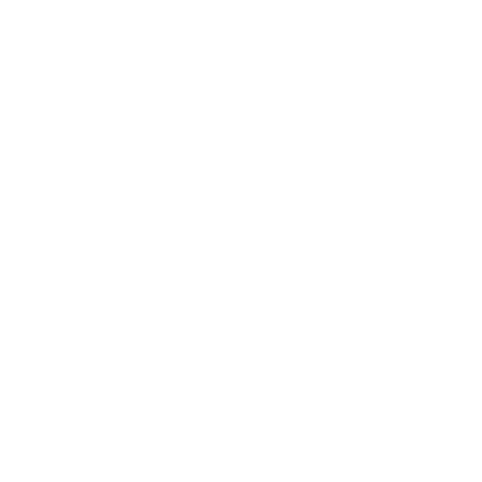

In [16]:
from Dense import Dense

import matplotlib.pyplot as plt

def visualize_network(network):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    ax.set_aspect('equal')

    layer_x = 0
    max_neurons = max(layer.get_num_neurons() for layer in network if isinstance(layer, Dense))

    for layer in network:
        if isinstance(layer, Dense):
            # Visualize the Dense layer
            layer_width = 1
            layer_height = max_neurons
            for i in range(layer.get_num_neurons()):
                ax.add_patch(plt.Rectangle((layer_x, i), layer_width, layer_height, fill=False, color='b', linestyle='dotted'))

            # Draw connections to the next layer
            if isinstance(network[network.index(layer) + 1], Dense):
                    for j in range(network[network.index(layer) + 1].num_neurons):
                        ax.plot([layer_x + layer_width, layer_x + layer_width + 1],
                                [i + 0.5, j + 0.5], 'b-', linewidth=1)

            layer_x += layer_width

        elif isinstance(layer, Tanh):
            # Visualize the Tanh activation function
            activation_x = layer_x + 0.5
            activation_y = max_neurons / 2
            ax.text(activation_x, activation_y, 'Tanh', ha='center', va='center', fontsize=12, color='r')

        layer_x += 1

    plt.title('Neural Network Visualization')
    plt.show()

# Example usage
visualize_network(network)
